# Assignment 3

**NAME:** weizhuo xiong

** ID :**914443957

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

In [1]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
import os

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [2]:
##input the path of each file, and return all the data and name of fruit or vegetables with row strat with 'Fresh' 
def get_all(pathDir,kind):
    name_list = []
    for t in range(len(pathDir)):
        Fruit = pd.read_excel(pathDir[t])
        Fruit = Fruit.iloc[:,:7].dropna()
        #get the name of fruit have fresh price
        if any(Fruit.iloc[:,0].str.startswith('Fresh')):
            name_list.append(os.listdir(kind)[t][:-5])
            #use specific method to treat unusual 'Fresh' form of data
            if os.listdir(kind)[t][:-5] == 'cabbage':
                name_list[-1] = 'green_cabbage'
                name_list.append('red_cabbage')
            elif os.listdir(kind)[t][:-5] == 'cucumbers':
                name_list.append('cucumbers_peeled')
        #get the data of fruit have fresh price
        if t == 0:
            Total = Fruit[Fruit.iloc[:,0].str.startswith('Fresh')]
        elif any(Fruit.iloc[:,0].str.startswith('Fresh')):
            Total = Total.append(Fruit[Fruit.iloc[:,0].str.startswith('Fresh')])
    return Total, name_list
##input string which is file name and return the pandas.Dataframe which contain wanted data
def show_data(kind):
    ##get the path of each excel in fruit file
    pathDir = [os.path.join(kind,fname) for fname in os.listdir(kind)]
    Total, name_list = get_all(pathDir, kind)

    ##operate on data, including drop NA column, change column name, add new column and reset index
    Total = Total.dropna(axis=1).iloc[:,[0,2,3,5]]
    Total.columns = ['price_per_lb','yield','lb_per_cup','price_per_cup']
    Total['form'] = 'Fresh1'
    Total['type'] = kind
    Total['food'] = name_list
    Total = Total.reset_index()
    Total = Total[['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']]
    return Total
Fruit = show_data('fruit')
Fruit

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
5,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
6,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
7,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
9,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

**Answer:** No, it didn't work as well as before, since there are several files which has empty Fresh line, since it has more than one kind of fresh vegetable. these vegetables are  <strong style="color:blue">carrot, cabbage,  cauliflower, celery, lettuce_romaine, mushroom and spinach</strong>. So I changed a little bit of original code, removing those data-lacking-row before execute DataFrame.

In [3]:
Vegetables = show_data('vegetables')
Vegetables

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
3,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
4,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
5,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
6,vegetables,green_cabbage,Fresh1,0.579208,0.778797,0.330693,0.245944
7,vegetables,red_cabbage,Fresh1,1.05645,0.779107,0.330693,0.448412
8,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001
9,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.8125


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [10]:
Combine = Fruit.append(Vegetables)
Combine = Combine.reset_index()[['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']]
#Combine.to_csv('fresh.csv')
Combine

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
5,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
6,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
7,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
9,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

**Answer No.1:**The <strong style="color:blue">raspberries</strong> is the most expensive fruit, and the <strong style="color:blue">watermelon</strong> is the least expensive fruit, and use scatter plot to visulize it.

Most ExpensiveL Fruit: 20    raspberries
Name: food, dtype: object
Least ExpensiveL Fruit: 23    watermelon
Name: food, dtype: object


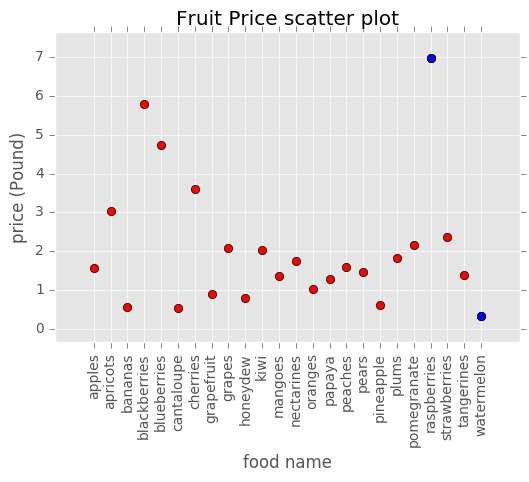

In [31]:
print 'Most ExpensiveL Fruit:', Fruit[Fruit['price_per_lb'] == max(Fruit['price_per_lb'])]['food']
print 'Least ExpensiveL Fruit:', Fruit[Fruit['price_per_lb'] == min(Fruit['price_per_lb'])]['food']
x = range(24)
y = Fruit['price_per_lb']
pathDir = [os.path.join('Fruit',fname) for fname in os.listdir('Fruit')]
_,labels = get_all(pathDir,'Fruit')
plt.plot(x, y, 'ro')
plt.plot(20, Combine['price_per_lb'][20], 'bo')
plt.plot(23, Combine['price_per_lb'][23], 'bo')
plt.title('Fruit Price scatter plot')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.1)
plt.xlabel('food name')
plt.ylabel('price (Pound)')
plt.show()

**Answer No.2:** The distribution of Fruit Price have one peak which locate between 1~2 pounds, and the distribution is more concentrated when compared with Vegetables histogram. Vegetables histogram have two peak, some of the vegetables prices locate near 1~1.5 pounds, and other's tend to locate near 2~3 pounds, which means they are more dispersed. 

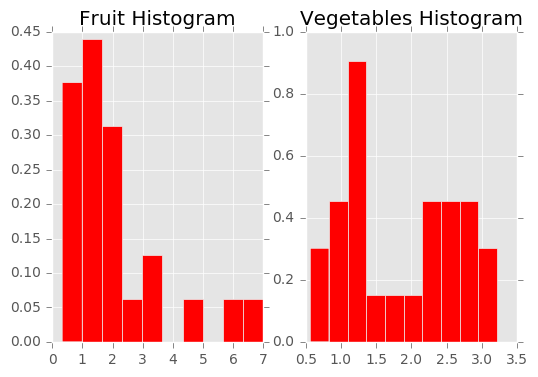

In [15]:
n_bin = 10
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()
ax0.hist(Fruit['price_per_lb'], 10, normed=1, histtype='bar', color='red',label='Fruit')
ax0.set_title('Fruit Histogram')
ax1.hist(Vegetables['price_per_lb'], 10, normed=1, histtype='bar', color='red',label='Vegetables')
ax1.set_title('Vegetables Histogram')
plt.show()

**Answer No.3:** I believe the price value equals to the original value multiplied by yield, the higher the yielded value is the higher the price value. <strong style="color:blue">Raspberries</strong> have the best price value, each pound cost 6.97 and get value 6.69.

Best Value Price Fruit: 20    raspberries
Name: food, dtype: object
Best Price Value of Raspberries: 6.6967783669


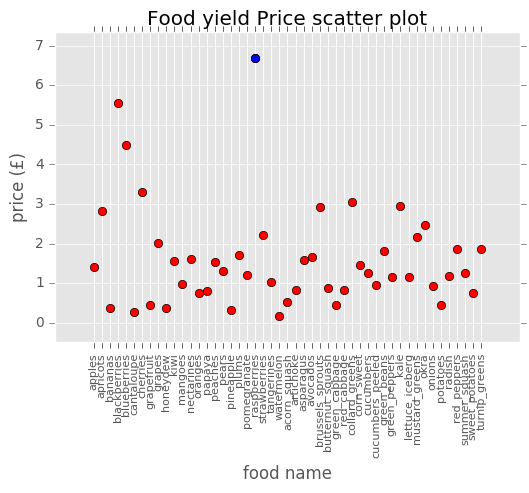

In [49]:
print 'Best Value Price Fruit:', Combine[Combine['price_per_lb']*Combine['yield'] ==
                                       max(Combine['price_per_lb']*Combine['yield'])]['food']
print 'Best Price Value of Raspberries:', Combine.iloc[20,3]*Combine.iloc[20,4]
x = range(49)
y = Combine['price_per_lb']*Combine['yield']
labels = Combine.iloc[:,1]
plt.plot(x, y, 'ro')
plt.plot(20, (Combine['price_per_lb']*Combine['yield'])[20], 'bo')
plt.xticks(x*2, labels, rotation='vertical',fontsize=8)
plt.title('Food yield Price scatter plot')
plt.xlabel('food name')
plt.ylabel('price ' +'('+ unichr(163) +')')
plt.margins(0.1)
plt.show()

**Answer No.4:** I plot the bar of value price( original price multiply by yield) and the bar of unyielded price, and overlap them. The answer is interesting, food like <strong style="color:#B0B">kale, brussel</strong> have yield factor over one, and <strong style="color:#B0B">artichoke, asparagus</strong> have yield factor lesser than 0.5. In addition, I plot the scatter plot of each food price and using price * (1-yield factor) as radius, and I found out, food pounds price <strong style="color:Red">located near 3 dollors</strong>  tends to have lowest yield factor.  

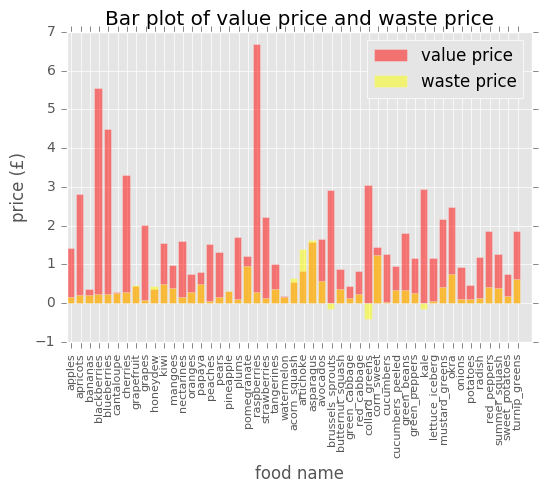

In [51]:
original = np.array(Combine['price_per_lb']*Combine['yield'])
yields = np.array(Combine['price_per_lb']*(1-Combine['yield']))
x = np.arange(len(Combine.iloc[:,1]))
labels = Combine.iloc[:,1]
plt.bar(x, original, color='red',label='value price', alpha=0.5)
plt.bar(x, yields, color='yellow',label='waste price', alpha=0.5)
plt.xticks(x+0.5, labels, rotation='vertical', fontsize=8)
plt.title('Bar plot of value price and waste price')
plt.xlabel('food name')
plt.ylabel('price ' +'('+ unichr(163) +')')
plt.legend()
plt.show()

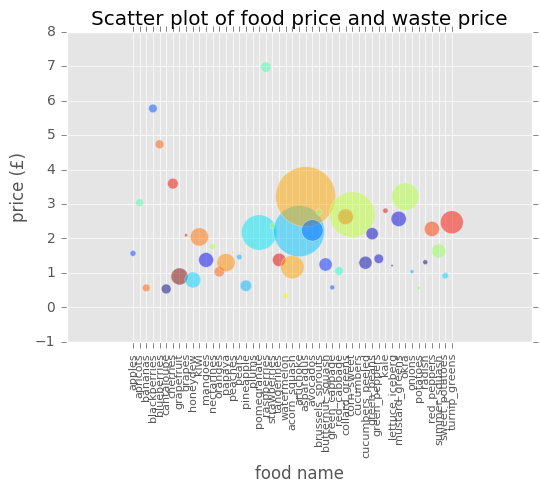

In [52]:
x = range(49)
y = Combine['price_per_lb']
labels = Combine.iloc[:,1]
colors = np.random.rand(49)
area = np.pi*(15*Combine['price_per_lb']*(1-Combine['yield']))**2
area= map(np.float64,area)
plt.scatter(np.array(x),np.array(y),s=area,c=colors,alpha=0.5)
plt.xticks(x, labels, rotation='vertical', fontsize=8)
plt.title('Scatter plot of food price and waste price')
plt.xlabel('food name')
plt.ylabel('price ' +'('+ unichr(163) +')')
plt.show()

**Answer No.5:** I filtrate top 6 price value food as below, and I guess collard_green is the best one, since berries seems not have outstanding nutrition, and collard has long been known to have the capacity to lower blood cholesterol levels, cancer protection and antioxidant capacity .

In [152]:
a = Combine['price_per_lb']*Combine['yield']
b = sorted(a)
c = Combine[Combine['price_per_lb']*Combine['yield']==b[-1]]
for i in range(2,7):
    c = c.append(Combine[Combine['price_per_lb']*Combine['yield']==b[-i]])
c

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
20,fruit,raspberries,Fresh1,6.97581,0.96,0.31967,2.32287
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
6,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
32,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001
38,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262
